<a href="https://colab.research.google.com/github/Veleces/Project/blob/main/Natural%20Gas%20Time%20Series%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and Import of requiered Libraries 

In [12]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd

# Data Preparation
Load the data from the CSV file

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
path = "/content/drive/MyDrive/Nat_Gas.csv"
gas_data = pd.read_csv(path)
gas_data

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


# Descriptive statistics

In [16]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [17]:
gas_data['Dates'] = pd.to_datetime(gas_data['Dates'])
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   48 non-null     datetime64[ns]
 1   Prices  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


In [18]:
gas_data.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


# Data Visualization

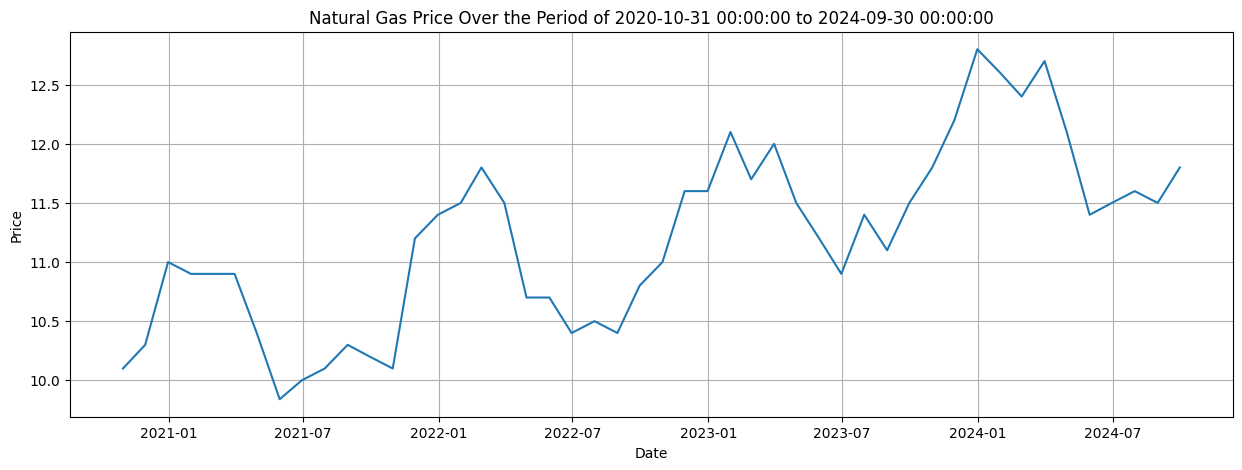

In [19]:
import matplotlib.pyplot as plt

# Plotting the time series data

plt.figure(figsize = (15, 5))
plt.plot(gas_data['Dates'], gas_data['Prices'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Natural Gas Price Over the Period of {gas_data['Dates'][0]} to {gas_data['Dates'].iloc[-1]}")
plt.grid(True)
plt.show()



# Model Selection SARIMA

Based on my observation of a trend with a seasonal pattern in the data, a suitable model for the time series forecasting could be SARIMA (Seasonal Autoregressive Integrated Moving Average). SARIMA models are capable of capturing both the trend and seasonal components in the data.

In [20]:
# Import the libraries required for the model

import pandas as pd
import statsmodels.api as sm

# A function for calculating the mean absolute error (mae) and mean squared   
# error (MSE) between predicted and actual values, used for model evaluation.

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Library for fitting and analyzing SARIMA models
from statsmodels.tsa.statespace.sarimax import SARIMAX

# A function for performing seasonal decomposition on time series data.
from statsmodels.tsa.seasonal import seasonal_decompose


In [21]:
# Set the ‘date’ column as the index. This allows for easier access and 
# manipulation of the time series data using the date as the reference point.

gas_data = gas_data.set_index('Dates')
gas_data


,Prices
Dates,
2020-10-31,10.10
2020-11-30,10.30
2020-12-31,11.00
2021-01-31,10.90
2021-02-28,10.90
2021-03-31,10.90
2021-04-30,10.40
2021-05-31,9.84
2021-06-30,10.00


# Decompose the time series data
The seasonal_decompose() function is applied to the 'Prices' column of the gas_data DataFrame to break down the time series data into its individual components. The decomposition model is specified as 'additive', indicating that the components are added together to form the original time series. The period = 12 parameter denotes the seasonal frequency, which is set to 12, assuming that the data has a yearly seasonality (for example, monthly data).

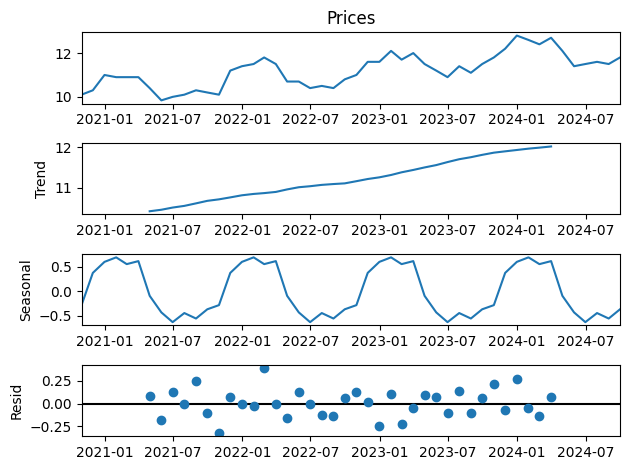

In [22]:
decomposition = seasonal_decompose(gas_data['Prices'], model = 'additive', 
                                   period = 12)
decomposition.plot()
plt.show()

In [58]:
# Split the dataset into training and testing sets. We will use .iloc because
# the index is not numeric or continuous

# The gas_data.iloc[:-12] statement selects all rows in the DataFrame df except for the last 12.
train_data = gas_data.iloc[ : -12]

# The gas_data.iloc[-12:] statement selects the last 12 rows in the DataFrame.
test_data = gas_data.iloc[-12 : ]


In [92]:
# Train the SARIMA model

model = SARIMAX(
    train_data['Prices'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))

result = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [111]:
#  Make predictions and evaluate the model

forecast = result.get_forecast(steps = 24)
predicted_prices = forecast.predicted_mean


In [113]:
predicted_prices = pd.DataFrame(predicted_prices)
predicted_prices = predicted_prices.rename(columns = {"predicted_mean" : "Price"})
predicted_prices['Price'] = predicted_prices['Price'].round(2)
predicted_prices

,Price
2023-10-31,11.06
2023-11-30,12.38
2023-12-31,12.20
2024-01-31,12.63
2024-02-29,12.67
2024-03-31,12.57
2024-04-30,11.81
2024-05-31,11.88
2024-06-30,11.39
2024-07-31,11.70


In [114]:
# Show the MAE, MSE and the RMSE

mae = mean_absolute_error(test_data['Prices'], predicted_prices[ : -12])
mse = mean_squared_error(test_data['Prices'], predicted_prices[ : -12])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse}")


Mean Absolute Error: 0.26833333333333353 
Mean Squared Error: 0.1174833333333335 
Root Mean Squared Error: 0.34275841832598875


# Vizualize the Predictions

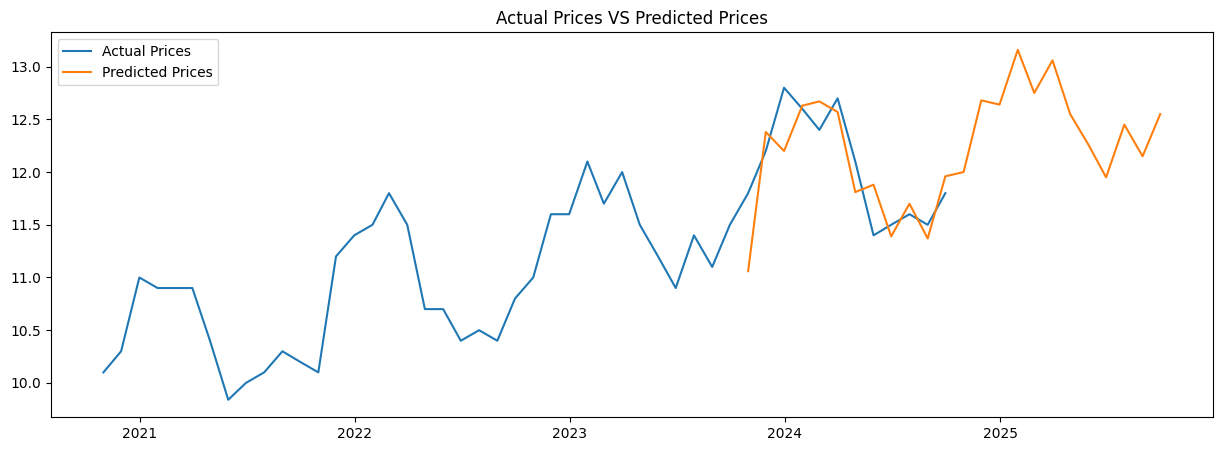

In [115]:
plt.figure(figsize = (15, 5))
plt.plot(gas_data['Prices'], label = 'Actual Prices')
plt.plot(predicted_prices, label = 'Predicted Prices')
plt.title(f"Actual Prices VS Predicted Prices")
plt.legend()
plt.show()

In [134]:
def get_price_estimate(date):
    
    # Convert the date to the format used in the DataFrame
    date = pd.to_datetime(date)

    # Find the price for the given date
    price = predicted_prices.loc[predicted_prices.index == date, 'Price'].values[0]

    return price


In [140]:
# Apply the function

date = "2023-10-31"
estimated_price = get_price_estimate(date)

print(f"The Estimated Price for {date} is ${estimated_price}")


The Estimated Price for 2023-10-31 is $11.06
